In [35]:
#data analysing phase
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
pd.pandas.set_option('display.max_columns',None)
import datetime
from datetime import timedelta

independent_feature = pd.read_csv(r'C:\Users\ATD\OneDrive\Desktop\ML\application_record.csv')
dependent_feature = pd.read_csv(r'C:\Users\ATD\OneDrive\Desktop\ML\credit_record.csv')



In [36]:
independent_feature.shape



(438557, 18)

In [37]:
independent_feature.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [38]:
dependent_feature.shape


(1048575, 3)

In [39]:
dependent_feature.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [40]:
data = independent_feature.merge(dependent_feature,how='inner',on=['ID'])

In [41]:
data.shape

(777715, 20)

In [42]:
data.rename(columns={'CODE_GENDER':'Gender','FLAG_OWN_CAR':'Car','FLAG_OWN_REALTY':'Reality',
                         'CNT_CHILDREN':'ChldNo','AMT_INCOME_TOTAL':'inc',
                         'NAME_EDUCATION_TYPE':'edutp','NAME_FAMILY_STATUS':'famtp',
                        'NAME_HOUSING_TYPE':'houtp','FLAG_EMAIL':'email',
                         'NAME_INCOME_TYPE':'inctp','FLAG_WORK_PHONE':'wkphone',
                         'FLAG_PHONE':'phone','CNT_FAM_MEMBERS':'famsize',
                        'OCCUPATION_TYPE':'occyp'
                        },inplace=True)

In [43]:
data.head()

,ID,Gender,Car,Reality,ChldNo,inc,inctp,edutp,famtp,houtp,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,wkphone,phone,email,occyp,famsize,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C


In [44]:
data['STATUS'].value_counts()

STATUS
C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: count, dtype: int64

In [45]:
data['inctp'].value_counts()

inctp
Working                 400164
Commercial associate    183385
Pensioner               128392
State servant            65437
Student                    337
Name: count, dtype: int64

In [46]:
data['DAYS_EMPLOYED'].value_counts()


DAYS_EMPLOYED
 365243    127972
-1751        1601
-1539        1545
-401         1498
-2531        1319
            ...  
-7765           1
-616            1
-738            1
-9320           1
-2848           1
Name: count, Length: 3640, dtype: int64

In [47]:
data['occyp'].value_counts()

occyp
Laborers                 131572
Core staff                77112
Sales staff               70362
Managers                  67738
Drivers                   47678
High skill tech staff     31768
Accountants               27223
Medicine staff            26691
Cooking staff             13416
Security staff            12400
Cleaning staff            11399
Private service staff      6714
Low-skill Laborers         3623
Secretaries                3149
Waiters/barmen staff       2557
HR staff                   1686
IT staff                   1319
Realty agents              1260
Name: count, dtype: int64

In [48]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              777715 non-null  int64  
 1   Gender          777715 non-null  object 
 2   Car             777715 non-null  object 
 3   Reality         777715 non-null  object 
 4   ChldNo          777715 non-null  int64  
 5   inc             777715 non-null  float64
 6   inctp           777715 non-null  object 
 7   edutp           777715 non-null  object 
 8   famtp           777715 non-null  object 
 9   houtp           777715 non-null  object 
 10  DAYS_BIRTH      777715 non-null  int64  
 11  DAYS_EMPLOYED   777715 non-null  int64  
 12  FLAG_MOBIL      777715 non-null  int64  
 13  wkphone         777715 non-null  int64  
 14  phone           777715 non-null  int64  
 15  email           777715 non-null  int64  
 16  occyp           537667 non-null  object 
 17  famsize   

In [49]:
data.describe()

,ID,ChldNo,inc,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,wkphone,phone,email,famsize,MONTHS_BALANCE
count,7.777150e+05,777715.000000,7.777150e+05,777715.000000,777715.000000,777715.0,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000
mean,5.078743e+06,0.428082,1.885348e+05,-16124.937046,57775.825016,1.0,0.231818,0.300965,0.091675,2.208837,-19.373564
std,4.180442e+04,0.745755,1.016225e+05,4104.304018,136471.735391,0.0,0.421993,0.458678,0.288567,0.907380,14.082208
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,5.044568e+06,0.000000,1.215000e+05,-19453.000000,-3292.000000,1.0,0.000000,0.000000,0.000000,2.000000,-29.000000
50%,5.069530e+06,0.000000,1.620000e+05,-15760.000000,-1682.000000,1.0,0.000000,0.000000,0.000000,2.000000,-17.000000
75%,5.115551e+06,1.000000,2.250000e+05,-12716.000000,-431.000000,1.0,0.000000,1.000000,0.000000,3.000000,-8.000000
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000


In [50]:
data.describe(include='object').T

,count,unique,top,freq
Gender,777715,2,F,518851
Car,777715,2,N,473355
Reality,777715,2,Y,512948
inctp,777715,5,Working,400164
edutp,777715,5,Secondary / secondary special,524261
famtp,777715,5,Married,546619
houtp,777715,6,House / apartment,697151
occyp,537667,18,Laborers,131572
STATUS,777715,8,C,329536


<Axes: >

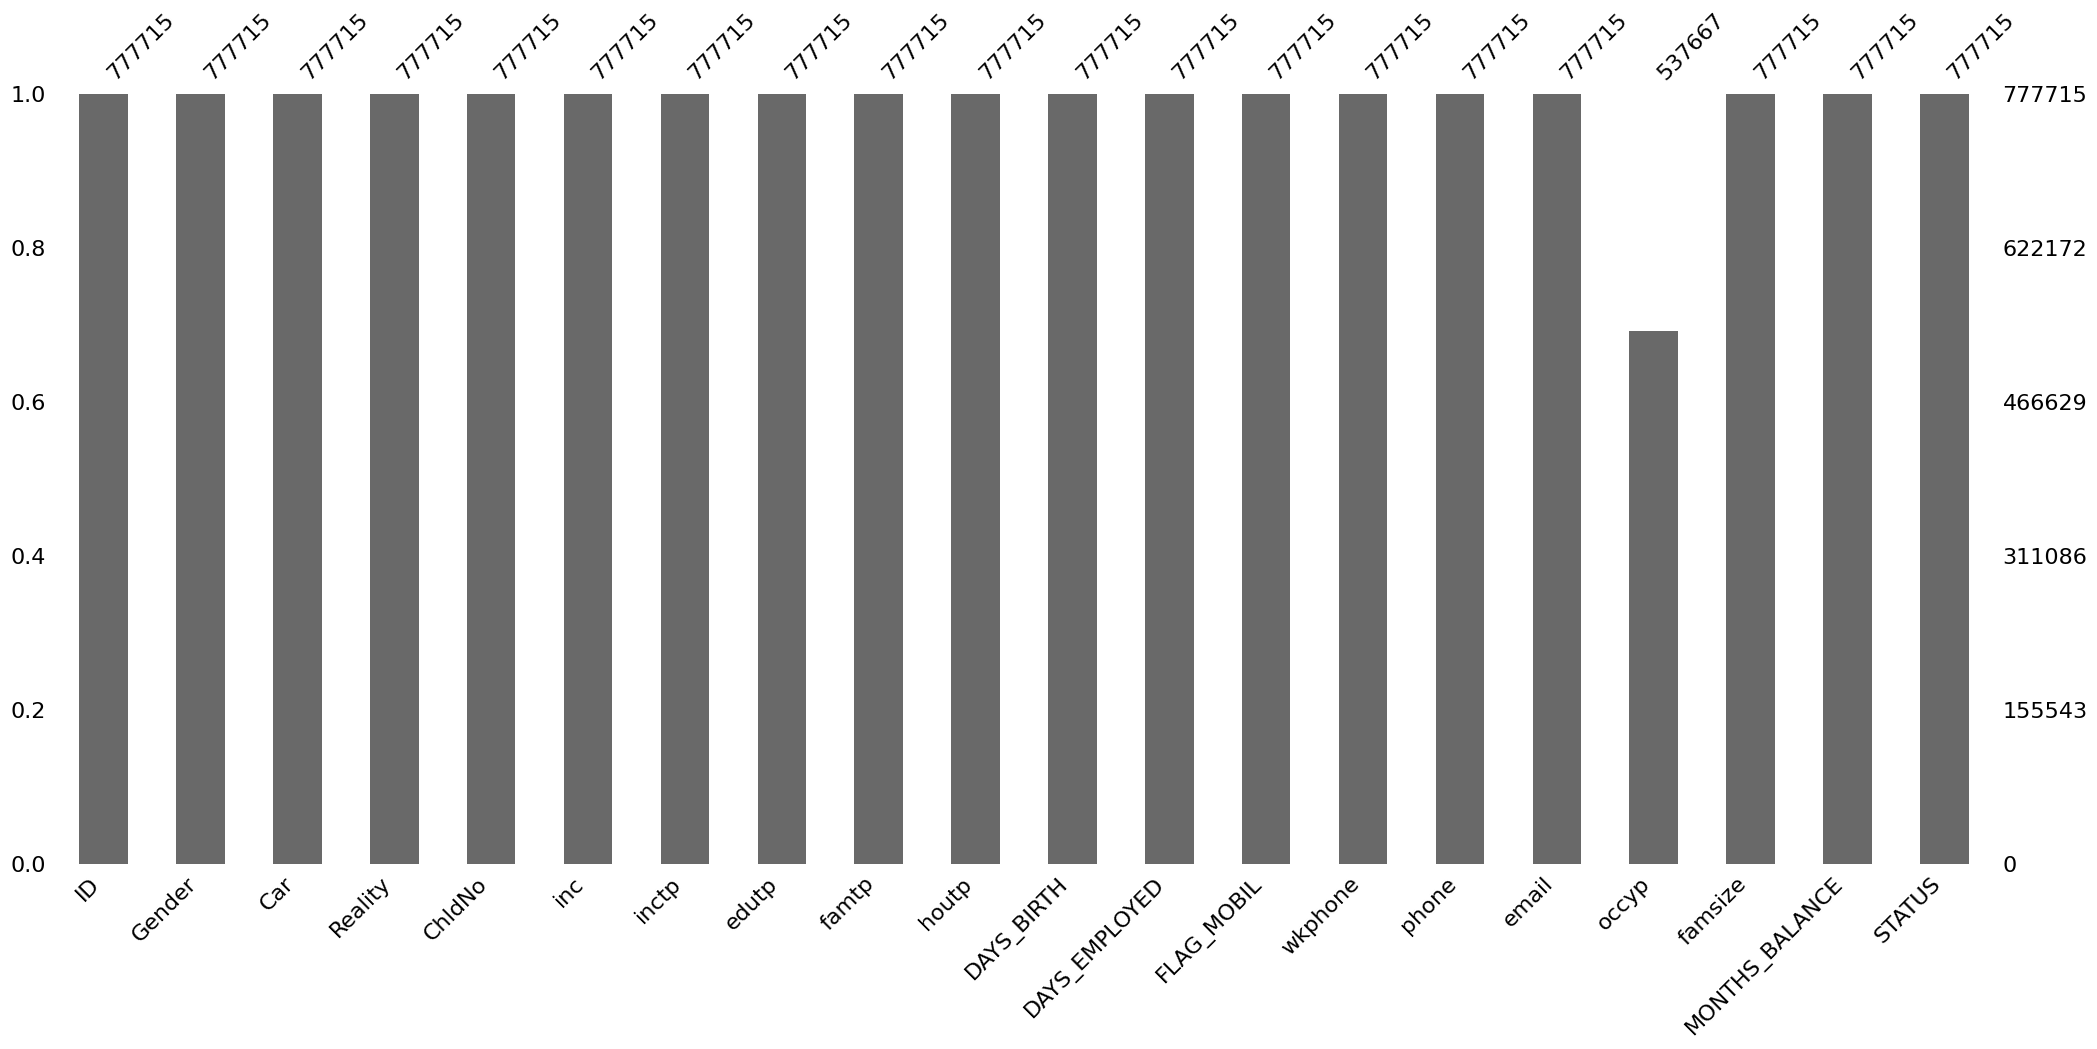

In [51]:
msno.bar(data)

DATA CLEANING

In [52]:
#NULL values in data
data.isnull().sum().sort_values(ascending=False)

occyp             240048
ID                     0
Car                    0
Gender                 0
Reality                0
ChldNo                 0
inctp                  0
inc                    0
famtp                  0
houtp                  0
DAYS_BIRTH             0
edutp                  0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
phone                  0
wkphone                0
email                  0
famsize                0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64

In [53]:
data.duplicated().sum()

np.int64(0)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              777715 non-null  int64  
 1   Gender          777715 non-null  object 
 2   Car             777715 non-null  object 
 3   Reality         777715 non-null  object 
 4   ChldNo          777715 non-null  int64  
 5   inc             777715 non-null  float64
 6   inctp           777715 non-null  object 
 7   edutp           777715 non-null  object 
 8   famtp           777715 non-null  object 
 9   houtp           777715 non-null  object 
 10  DAYS_BIRTH      777715 non-null  int64  
 11  DAYS_EMPLOYED   777715 non-null  int64  
 12  FLAG_MOBIL      777715 non-null  int64  
 13  wkphone         777715 non-null  int64  
 14  phone           777715 non-null  int64  
 15  email           777715 non-null  int64  
 16  occyp           537667 non-null  object 
 17  famsize   

In [55]:
data['occyp'].value_counts()

occyp
Laborers                 131572
Core staff                77112
Sales staff               70362
Managers                  67738
Drivers                   47678
High skill tech staff     31768
Accountants               27223
Medicine staff            26691
Cooking staff             13416
Security staff            12400
Cleaning staff            11399
Private service staff      6714
Low-skill Laborers         3623
Secretaries                3149
Waiters/barmen staff       2557
HR staff                   1686
IT staff                   1319
Realty agents              1260
Name: count, dtype: int64

In [56]:
#data['occyp'].fillna('Other',inplace=True)
data.fillna({'occyp': 'Other'}, inplace=True)

In [57]:
data['occyp'].value_counts()

occyp
Other                    240048
Laborers                 131572
Core staff                77112
Sales staff               70362
Managers                  67738
Drivers                   47678
High skill tech staff     31768
Accountants               27223
Medicine staff            26691
Cooking staff             13416
Security staff            12400
Cleaning staff            11399
Private service staff      6714
Low-skill Laborers         3623
Secretaries                3149
Waiters/barmen staff       2557
HR staff                   1686
IT staff                   1319
Realty agents              1260
Name: count, dtype: int64

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              777715 non-null  int64  
 1   Gender          777715 non-null  object 
 2   Car             777715 non-null  object 
 3   Reality         777715 non-null  object 
 4   ChldNo          777715 non-null  int64  
 5   inc             777715 non-null  float64
 6   inctp           777715 non-null  object 
 7   edutp           777715 non-null  object 
 8   famtp           777715 non-null  object 
 9   houtp           777715 non-null  object 
 10  DAYS_BIRTH      777715 non-null  int64  
 11  DAYS_EMPLOYED   777715 non-null  int64  
 12  FLAG_MOBIL      777715 non-null  int64  
 13  wkphone         777715 non-null  int64  
 14  phone           777715 non-null  int64  
 15  email           777715 non-null  int64  
 16  occyp           777715 non-null  object 
 17  famsize   

In [59]:
data.loc[data['STATUS']=='C','STATUS']=6
data.loc[data['STATUS']=='X','STATUS']=7
data['STATUS']=data['STATUS'].astype(float)

In [60]:
def solve(state):
    target=''
    if state in (2,3,4,5):
        target=1 #Risky
    else :
        target=0 #not Risky
        
    return target

In [61]:
data['Target']=data['STATUS'].apply(solve)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              777715 non-null  int64  
 1   Gender          777715 non-null  object 
 2   Car             777715 non-null  object 
 3   Reality         777715 non-null  object 
 4   ChldNo          777715 non-null  int64  
 5   inc             777715 non-null  float64
 6   inctp           777715 non-null  object 
 7   edutp           777715 non-null  object 
 8   famtp           777715 non-null  object 
 9   houtp           777715 non-null  object 
 10  DAYS_BIRTH      777715 non-null  int64  
 11  DAYS_EMPLOYED   777715 non-null  int64  
 12  FLAG_MOBIL      777715 non-null  int64  
 13  wkphone         777715 non-null  int64  
 14  phone           777715 non-null  int64  
 15  email           777715 non-null  int64  
 16  occyp           777715 non-null  object 
 17  famsize   

In [63]:
#X = data.drop(columns=['STATUS'])
#y = data['STATUS']

In [64]:
# Assuming X and y are already defined
'''categorical_columns = X.select_dtypes(include=['object']).columns
print(categorical_columns)'''

"categorical_columns = X.select_dtypes(include=['object']).columns\nprint(categorical_columns)"

In [65]:
'''def one_hot_encode_x(X, categorical_columns):
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    encoded_array_X = encoder.fit_transform(X[categorical_columns])
    encoded_df_X = pd.DataFrame(encoded_array_X, columns=encoder.get_feature_names_out(categorical_columns))
    X = X.drop(columns=categorical_columns)
    X = pd.concat([X, encoded_df_X], axis=1)

    return X

def one_hot_encode_y(y):
    encoder = OneHotEncoder(sparse_output=False)
    encoded_array_y = encoder.fit_transform(y.values.reshape(-1, 1))
    encoded_df_y = pd.DataFrame(encoded_array_y, columns=["Status_" + str(i) for i in range(encoded_array_y.shape[1])])

    return encoded_df_y'''
    

from sklearn.preprocessing import OneHotEncoder

# Assuming `data` is your dataset and `STATUS` is the target column
X = data.drop(columns=['STATUS'])
categorical_columns = X.select_dtypes(include=['object']).columns

# Convert all categorical columns to string type
X[categorical_columns] = X[categorical_columns].astype(str)

# Function to one-hot encode specified columns in a DataFrame
def one_hot_encode_x(X, categorical_columns):
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    encoded_array_X = encoder.fit_transform(X[categorical_columns])
    encoded_df_X = pd.DataFrame(encoded_array_X, columns=encoder.get_feature_names_out(categorical_columns))
    X = X.drop(columns=categorical_columns)
    X = pd.concat([X, encoded_df_X], axis=1)
    return X

# Apply the one-hot encoding function
X_encoded = one_hot_encode_x(X, categorical_columns)

#y_encoded = one_hot_encode_y(y)

In [66]:
X[categorical_columns].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Gender   777715 non-null  object
 1   Car      777715 non-null  object
 2   Reality  777715 non-null  object
 3   inctp    777715 non-null  object
 4   edutp    777715 non-null  object
 5   famtp    777715 non-null  object
 6   houtp    777715 non-null  object
 7   occyp    777715 non-null  object
dtypes: object(8)
memory usage: 47.5+ MB


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              777715 non-null  int64  
 1   Gender          777715 non-null  object 
 2   Car             777715 non-null  object 
 3   Reality         777715 non-null  object 
 4   ChldNo          777715 non-null  int64  
 5   inc             777715 non-null  float64
 6   inctp           777715 non-null  object 
 7   edutp           777715 non-null  object 
 8   famtp           777715 non-null  object 
 9   houtp           777715 non-null  object 
 10  DAYS_BIRTH      777715 non-null  int64  
 11  DAYS_EMPLOYED   777715 non-null  int64  
 12  FLAG_MOBIL      777715 non-null  int64  
 13  wkphone         777715 non-null  int64  
 14  phone           777715 non-null  int64  
 15  email           777715 non-null  int64  
 16  occyp           777715 non-null  object 
 17  famsize   

In [68]:
for col in categorical_columns:
    data[col] = pd.Categorical(data[col]).codes  # Assign codes to categories (-1 for NaN)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              777715 non-null  int64  
 1   Gender          777715 non-null  int8   
 2   Car             777715 non-null  int8   
 3   Reality         777715 non-null  int8   
 4   ChldNo          777715 non-null  int64  
 5   inc             777715 non-null  float64
 6   inctp           777715 non-null  int8   
 7   edutp           777715 non-null  int8   
 8   famtp           777715 non-null  int8   
 9   houtp           777715 non-null  int8   
 10  DAYS_BIRTH      777715 non-null  int64  
 11  DAYS_EMPLOYED   777715 non-null  int64  
 12  FLAG_MOBIL      777715 non-null  int64  
 13  wkphone         777715 non-null  int64  
 14  phone           777715 non-null  int64  
 15  email           777715 non-null  int64  
 16  occyp           777715 non-null  int8   
 17  famsize   

In [70]:
data.head()

,ID,Gender,Car,Reality,ChldNo,inc,inctp,edutp,famtp,houtp,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,wkphone,phone,email,occyp,famsize,MONTHS_BALANCE,STATUS,Target
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,12,2.0,0,6.0,0
1,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,12,2.0,-1,6.0,0
2,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,12,2.0,-2,6.0,0
3,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,12,2.0,-3,6.0,0
4,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,12,2.0,-4,6.0,0


In [71]:
data['Gender'].value_counts()

Gender
0    518851
1    258864
Name: count, dtype: int64

In [72]:
data = data.drop(columns=['Car'])
data = data.drop(columns=['Reality']) 
data = data.drop(columns=['occyp'])
data = data.drop(columns=['FLAG_MOBIL'])
data = data.drop(columns=['wkphone'])
data = data.drop(columns=['STATUS'])
data = data.drop(columns=['email'])

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              777715 non-null  int64  
 1   Gender          777715 non-null  int8   
 2   ChldNo          777715 non-null  int64  
 3   inc             777715 non-null  float64
 4   inctp           777715 non-null  int8   
 5   edutp           777715 non-null  int8   
 6   famtp           777715 non-null  int8   
 7   houtp           777715 non-null  int8   
 8   DAYS_BIRTH      777715 non-null  int64  
 9   DAYS_EMPLOYED   777715 non-null  int64  
 10  phone           777715 non-null  int64  
 11  famsize         777715 non-null  float64
 12  MONTHS_BALANCE  777715 non-null  int64  
 13  Target          777715 non-null  int64  
dtypes: float64(2), int64(7), int8(5)
memory usage: 57.1 MB


In [74]:
x=data.drop('Target',axis=1)
y=data['Target']

In [75]:
'''from imblearn.combine import SMOTETomek
smk=SMOTETomek(random_state=12)
x_res,y_res=smk.fit_resample(x,y)'''



'from imblearn.combine import SMOTETomek\nsmk=SMOTETomek(random_state=12)\nx_res,y_res=smk.fit_resample(x,y)'

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=567)
x_train.shape,y_train.shape

((622172, 13), (622172,))

In [77]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
print(f"Original training dataset size: {x_train.shape, y_train.shape}")
print(f"Resampled training dataset size: {x_train_resampled.shape, y_train_resampled.shape}")

Original training dataset size: ((622172, 13), (622172,))
Resampled training dataset size: ((1239852, 13), (1239852,))


In [78]:
## import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score



#model_list=[LogisticRegression,RandomForestClassifier,DecisionTreeClassifier,GaussianNB,KNeighborsClassifier]


    
    

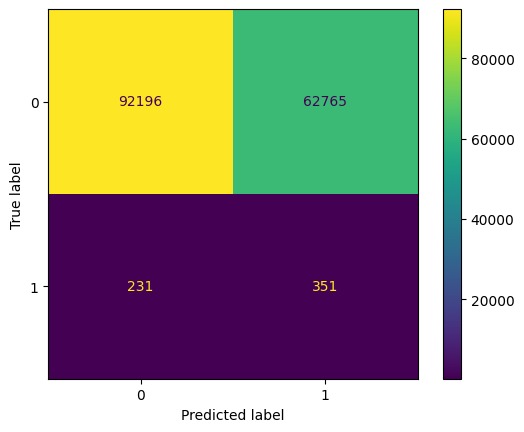

In [79]:
accuracy =[]
'''for model in model_list :
    model = model()
    model.fit(x_train,y_train)'''
    
'''# Create an instance of LogisticRegression
model = LogisticRegression()

# Fit the model
model.fit(x_train_resampled, y_train_resampled)

y_pred = model.predict(x_test)'''"Engy Wael 202101008 - Lab_3_Tasks.ipynb"

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Standardize data and fit Logistic Regression
scaler = StandardScaler()
model = LogisticRegression(solver='saga', max_iter=500, random_state=42)

pipeline = Pipeline([
    ('scaler', scaler),
    ('logistic', model)
])

pipeline.fit(x_train_resampled, y_train_resampled)

# Predict and evaluate
y_pred = pipeline.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
accuracy.append(accuracy_score(y_test,y_pred))

In [80]:
accuracy

[0.5949930244369724]

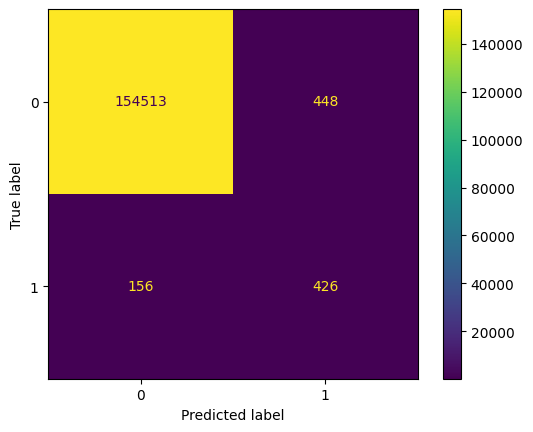

In [81]:
#accuracy =[]
'''for model in model_list :
    model = model()
    model.fit(x_train,y_train)'''
    
# Create an instance of LogisticRegression
model = RandomForestClassifier()

# Fit the model
model.fit(x_train_resampled, y_train_resampled)

y_pred = model.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
accuracy.append(accuracy_score(y_test,y_pred))

In [82]:
accuracy

[0.5949930244369724, 0.996116829429804]

Cross-Validation Scores: [0.99662057 0.99761666 0.99766101 0.99762471 0.99764891]
Mean CV Accuracy: 1.00
Test Accuracy: 1.00


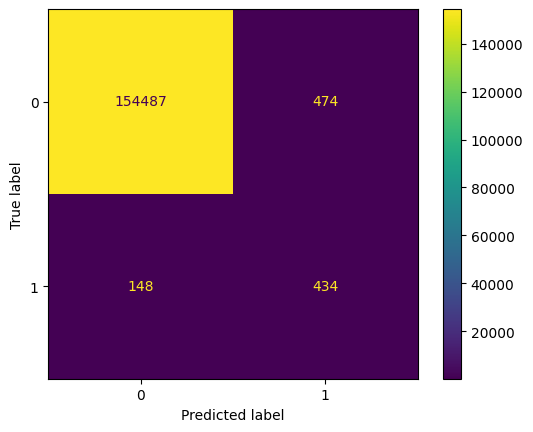

In [83]:
''' # Create an instance of LogisticRegression
model = DecisionTreeClassifier()

# Fit the model
model.fit(x_train_resampled, y_train_resampled)

y_pred = model.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
accuracy.append(accuracy_score(y_test,y_pred))'''

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


# Create an instance of DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, x_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

# Print cross-validation results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")

# Train the model on the full resampled training data
model.fit(x_train_resampled, y_train_resampled)

# Test the model on the test set
y_pred = model.predict(x_test)

# Display confusion matrix and test accuracy
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Optionally, store the test accuracy in the accuracy list
accuracy.append(test_accuracy)


In [86]:
accuracy

[0.5949930244369724, 0.996116829429804, 0.9960011058035398]

Cross-Validation Scores: [0.99518492 0.99572934 0.99566883 0.99558818 0.99576965]
Mean CV Accuracy: 1.00
Test Accuracy: 0.99


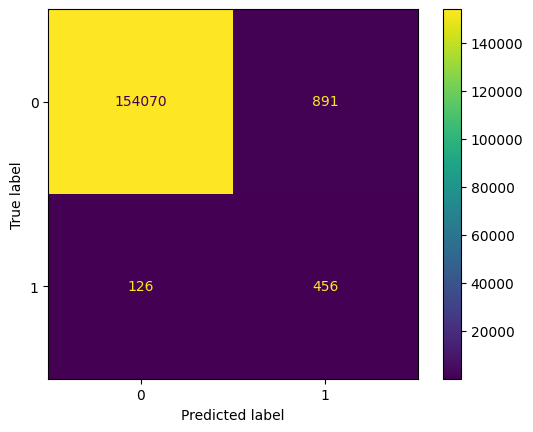

In [88]:


'''  # Create an instance of LogisticRegression
model = KNeighborsClassifier()

# Fit the model
model.fit(x_train_resampled, y_train_resampled)

y_pred = model.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
accuracy.append(accuracy_score(y_test,y_pred))'''"Engy Wael 202101008 - Lab_3_Tasks.ipynb"

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from imblearn.over_sampling import SMOTE

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Create an instance of KNeighborsClassifier
model = KNeighborsClassifier()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, x_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

# Print cross-validation results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")

# Train the model on the full resampled training data
model.fit(x_train_resampled, y_train_resampled)

# Test the model on the test set
y_pred = model.predict(x_test)

# Display confusion matrix and test accuracy
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Optionally, store the test accuracy in the accuracy list
accuracy.append(test_accuracy)


In [89]:
accuracy

[0.5949930244369724,
 0.996116829429804,
 0.9960011058035398,
 0.9934616151160772,
 0.9934616151160772]

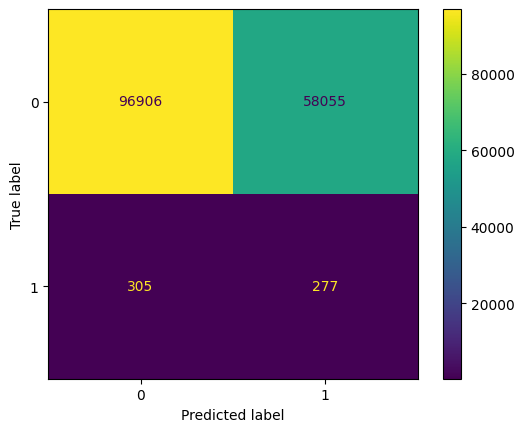

In [90]:


  # Create an instance of LogisticRegression
model = GaussianNB()


# Fit the model
model.fit(x_train_resampled, y_train_resampled)

y_pred = model.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
accuracy.append(accuracy_score(y_test,y_pred))

In [91]:
accuracy

[0.5949930244369724,
 0.996116829429804,
 0.9960011058035398,
 0.9934616151160772,
 0.9934616151160772,
 0.6247982872903313]

Based on the accuracy values, the best model is Random Forest Classifier with accuracy 99.6%